# PCA Practice

## Modules

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Load data

In [2]:
data= pd.read_csv("Wine.csv")

In [3]:
data.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
107,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,2
51,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265,1
89,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625,2
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,3


In [4]:
X= data.iloc[:,0:13].values
y= data.iloc[:,13].values

## Preprocessing data

### Split data

In [22]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=.25, random_state=0)

### Scaling

In [23]:
sx= StandardScaler()
x_train= sx.fit_transform(x_train)
x_test= sx.fit_transform(x_test)

## PCA

In [24]:
pca= PCA(n_components=2)
x_train= pca.fit_transform(x_train)
x_test= pca.transform(x_test)

In [25]:
pca.explained_variance_ratio_

array([0.37281068, 0.18739996])

## Logistic regression

In [26]:
regLog= LogisticRegression(random_state=0)
regLog.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [27]:
y_predict= regLog.predict(x_test)

In [28]:
y_predict

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2], dtype=int64)

In [29]:
cm= confusion_matrix(y_test,y_predict)

In [30]:
cm

array([[16,  0,  0],
       [ 1, 19,  1],
       [ 0,  0,  8]], dtype=int64)

In [31]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


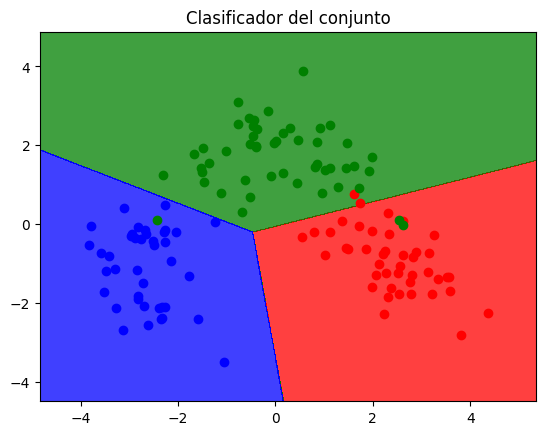

In [35]:
X1,X2= np.meshgrid(np.arange(start=x_train[:,0].min()-1, stop= x_train[:,0].max()+1,step= .01),
                   np.arange(start=x_train[:,1].min()-1, stop= x_train[:,1].max()+1,step= .01))
plt.contourf(X1,X2,regLog.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train==j,0],x_train[y_train==j,1],
                c= ListedColormap(('red','green','blue'))(i),label=j)
    
plt.title("Clasificador del conjunto")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


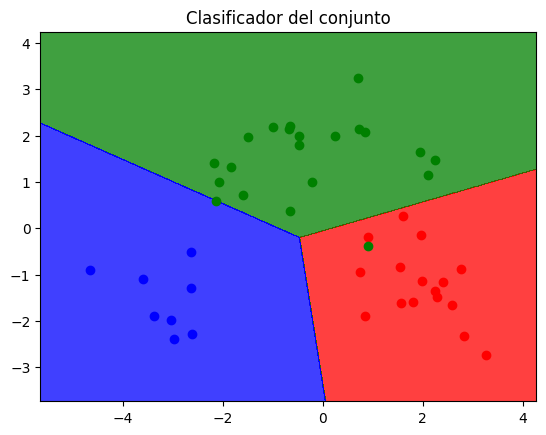

In [36]:
X1,X2= np.meshgrid(np.arange(start=x_test[:,0].min()-1, stop= x_test[:,0].max()+1,step= .01),
                   np.arange(start=x_test[:,1].min()-1, stop= x_test[:,1].max()+1,step= .01))
plt.contourf(X1,X2,regLog.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(x_test[y_test==j,0],x_test[y_test==j,1],
                c= ListedColormap(('red','green','blue'))(i),label=j)
    
plt.title("Clasificador del conjunto")
plt.show()